In [11]:
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv


In [12]:
df = pd.read_csv("result_contiki-ng.csv", header=1, encoding='utf-8')
display(df)

,Unnamed: 0,adamdunkels,nifi,gpz,bg-,oliverschmidt,fros4943,barner,ksb,joxe,...,steffen.thielemans@gmail.com,jonsson.peter.a@gmail.com,ffjla@dtu.dk,tobias.scharnowski@rub.de,dianadeac191@gmail.com,git@simon-woerner.de,robbe.elsas@ugent.be,tdesmet@gmail.com.1,shen497@purdue.edu,grega.morano@ijs.si
0,core/net,30.669711,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.304414,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,core/net/dhcpc.c,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,core/net/tcpip.c,100.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,core/dev,23.333333,6.666667,0.0,16.666667,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,core/dev/cc2420.c,50.000000,0.000000,0.0,50.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,os/net/routing/rpl-classic/rpl-timers.c,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
606,os/net/routing/rpl-lite,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,os/net/routing/rpl-lite/rpl-dag.c,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,os/net/routing/rpl-lite/rpl-neighbor.c,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Extrair os nomes dos autores, ignorando a primeira coluna
autores = df.columns[1:].tolist()
print(autores)

# Inicializar dicionários para contar arquivos por desenvolvedor e desenvolvedores por arquivo
arquivos_por_responsavel = {autor: 0 for autor in autores}
responsaveis_por_arquivo = {}

# Iterar sobre cada autor
for autor in autores:
    arquivos = []
    for index, row in df.iterrows():
        try:
            ownership = float(row[autor])
        except ValueError:
            ownership = 0.0
        if ownership > 0:  # Se a posse do arquivo for maior que 0%
            arquivo = row['Unnamed: 0']
            arquivos.append(arquivo)
            arquivos_por_responsavel[autor] += 1  # Incrementar contador de arquivos do desenvolvedor
            
            # Incrementar contador de desenvolvedores do arquivo
            if arquivo in responsaveis_por_arquivo:
                responsaveis_por_arquivo[arquivo].add(autor)
            else:
                responsaveis_por_arquivo[arquivo] = {autor}
    
    if arquivos:  # Só imprimir se houver arquivos
        print(f"Arquivos de {autor}: {arquivos}")
    else:
        print(f"Arquivos de {autor}: Nenhum arquivo encontrado")




['adamdunkels', 'nifi', 'gpz', 'bg-', 'oliverschmidt', 'fros4943', 'barner', 'ksb', 'joxe', 'nvt-se', 'matsutsuka', 'zhitao', 'thiemovoigt', 'julienabeille', 'c_oflynn', 'mdurvy', 'blakelev', 'dak664', 'mar@devl.org', 'zdshelby', 'kasunch', 'anthony-a', 'maralvira', 'jim@jtan.com', 'salvopitru', 'doganyazar', 'enricmcalvo', 'nvt@sics.se', 'nvt@conjecture.ad.sics.se', 'adam@sics.se', 'nfi@bredband.net', 'joakime@sics.se', 'fros@sics.se', 'enricmacalvo@users.sourceforge.net', 'lionel_debroux@yahoo.fr', 'nfi@sics.se', 'dak664@embarqmail.com', 'joakime@nes-ipv6.sics.se', 'Salvo@.(none)', 'salvopitru@users.sourceforge.net', 'oliverschmidt@users.sourceforge.net', 'dogan@dogan-laptop.(none)', 'zhitao@sics.se', 'gamaguchi@gmail.com', 'vincent.brillault@imag.fr', 'ksb@fluffware.se', 'maniacbug@ymail.com', 'niko.pollner@cs.fau.de', 'simonduq@sics.se', 'kovatsch@inf.ethz.ch', 'maxim.osipov@gmail.com', 'delamer@inicotech.com', 'njh@aelius.com', 'ilya.dmitrichenko@pachube.com', 'g.oikonomou@bristol

In [23]:
# Função para contar o número total de responsáveis por arquivos
def contar_responsaveis_com_arquivos(arquivos_por_responsavel):
    # Contar apenas autores que têm arquivos
    responsaveis_com_arquivos = sum(1 for count in arquivos_por_responsavel.values() if count > 0)
    return responsaveis_com_arquivos

# Usar a função
total_responsaveis = contar_responsaveis_com_arquivos(arquivos_por_responsavel)
print(f"Total de responsáveis: {total_responsaveis}")

Total de responsáveis: 68


In [22]:
# Função para contar o número total de responsáveis por arquivos
def contar_responsaveis_com_arquivos(arquivos_por_responsavel):
    # Contar apenas autores que têm arquivos
    responsaveis_com_arquivos = sum(1 for count in arquivos_por_responsavel.values())
    return responsaveis_com_arquivos

# Usar a função
total_responsaveis = contar_responsaveis_com_arquivos(arquivos_por_responsavel)
print(f"Total de contribuidores: {total_responsaveis}")

Total de contribuidores: 281


In [15]:
# Caminho do arquivo CSV de saída
output_file = 'contagem_arquivos_por_responsavel_contiki-ng.csv'

# Escrever contagem de arquivos por responsavel em CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Responsável', 'Descrição'])

    for autor, count in arquivos_por_responsavel.items():
        if count == 1:
            writer.writerow([autor, f"{count}"])
        else:
            writer.writerow([autor, f"{count}"])

print(f"Contagem de arquivos por desenvolvedor salva em {output_file}")



Contagem de arquivos por desenvolvedor salva em contagem_arquivos_por_responsavel_contiki-ng.csv


In [16]:
data = pd.read_csv("contagem_arquivos_por_responsavel_contiki-ng.csv", encoding='utf-8')
display(data)

,Responsável,Descrição
0,adamdunkels,90
1,nifi,9
2,gpz,0
3,bg-,8
4,oliverschmidt,46
...,...,...
276,git@simon-woerner.de,0
277,robbe.elsas@ugent.be,0
278,tdesmet@gmail.com.1,0
279,shen497@purdue.edu,0


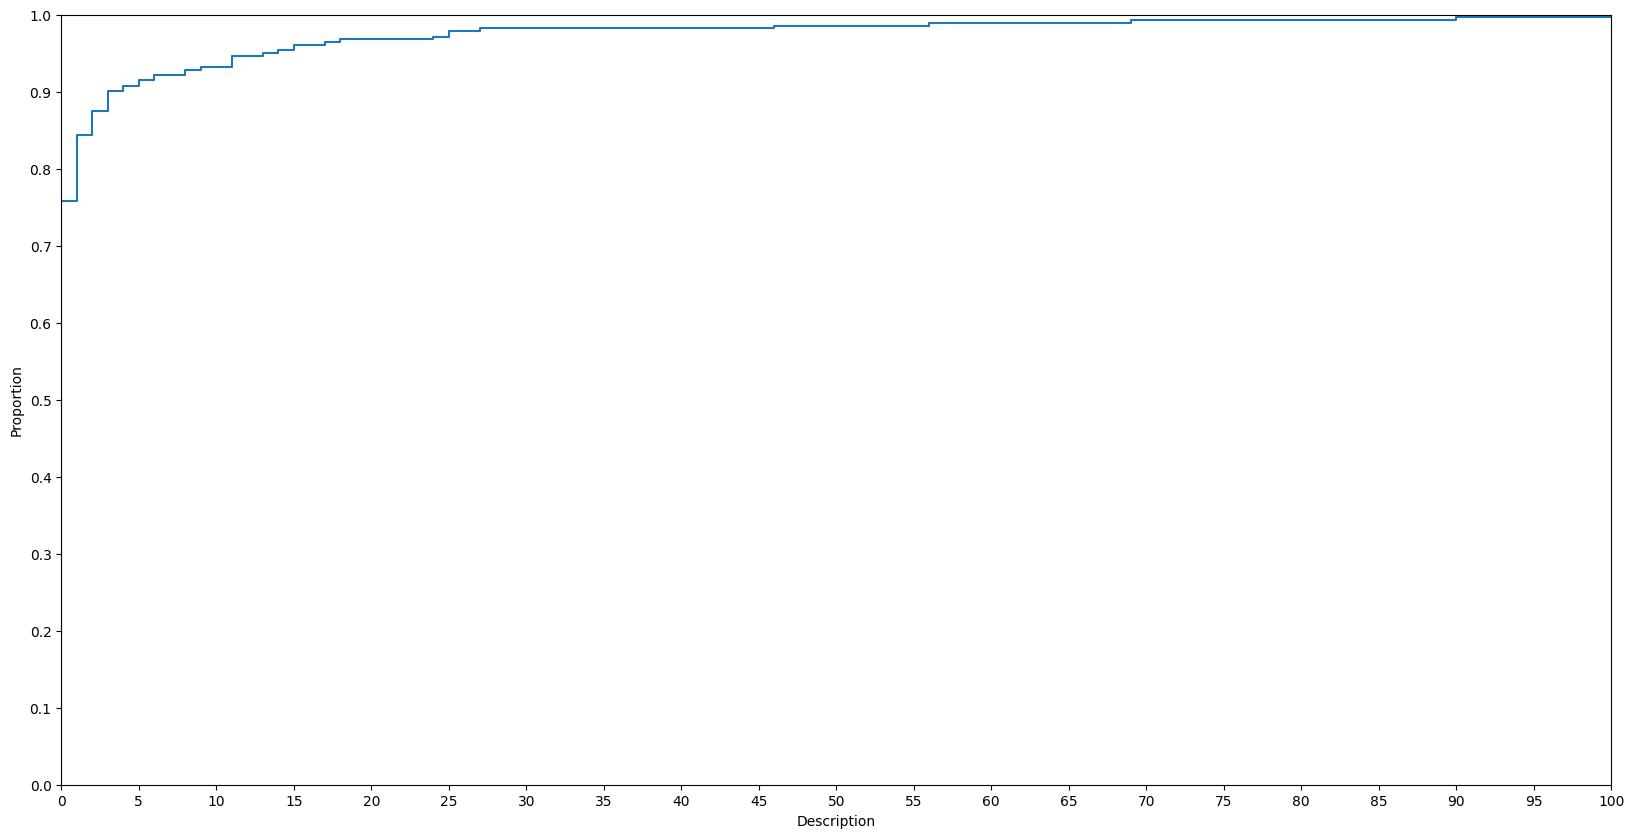

In [17]:
# Converter a coluna "Descrição" para valores numéricos
data['Descrição'] = pd.to_numeric(data['Descrição'], errors='coerce')

# Definir o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criar o gráfico ECDF
sns.ecdfplot(data=data, x='Descrição')


plt.ylim(0, 1)  # Ajustar a escala do eixo y

plt.yticks(np.arange(0, 1.1, 0.1))  # Ajustar os ticks do eixo y para que sejam de 0.1 em 0.1

plt.xlabel('Description') # Definir o rótulo do eixo x

# Ajustar a escala do eixo x
plt.xlim(0, 100)  # Ajuste os valores conforme necessário

# Ajustar os ticks do eixo x para que sejam de 5 em 5
plt.xticks(np.arange(0, 101, 5))

# Exibir o gráfico
plt.show()

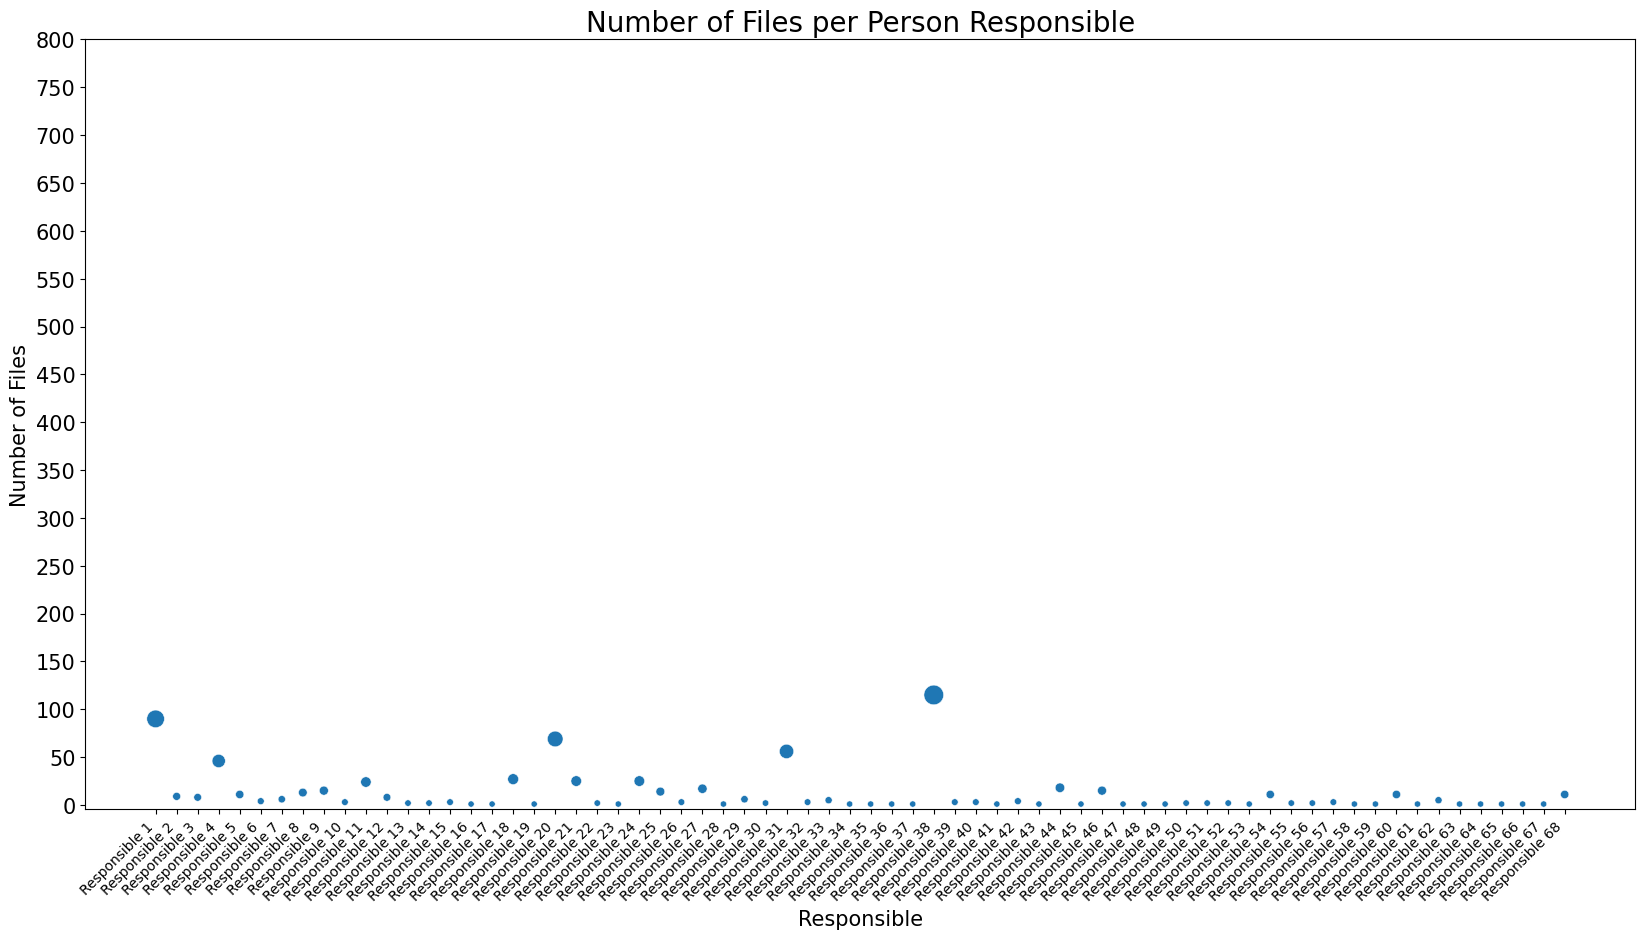

In [18]:

# Filtrar os dados para mostrar apenas aqueles com mais de 20 arquivos, excluindo os responsáveis com 0 arquivos
filtered_data = data[data['Descrição'] > 0].copy()

# Substituir e-mails por "Responsável 1", "Responsável 2", etc.
filtered_data['Responsável'] = ['Responsible {}'.format(i+1) for i in range(len(filtered_data))]

# Criar uma coluna "Tamanho" para o tamanho das bolhas
filtered_data['Tamanho'] = filtered_data['Descrição'] * 10  # Ajuste conforme necessário

# Criar o gráfico de bolhas
plt.figure(figsize=(20, 10))
sns.scatterplot(data=filtered_data, x='Responsável', y='Descrição', size='Tamanho', sizes=(20, 200), legend=False)

# Rotacionar os rótulos do eixo x
plt.xticks(rotation=45, ha='right')

plt.xlabel('Responsible', fontsize=15)  # Ajustar o rótulo do eixo x
plt.ylabel('Number of Files', fontsize=15)  # Ajustar o rótulo do eixo y
plt.title('Number of Files per Person Responsible', fontsize=20)  # Título do gráfico

plt.yticks(np.arange(0, 801, 50), fontsize=15)  # Ajustar os ticks do eixo y

# Exibir o gráfico
plt.show()

In [19]:
# Contar número de responsáveis por arquivo
num_responsaveis_por_arquivo = {arquivo: len(responsaveis) 
                                   for arquivo, responsaveis in responsaveis_por_arquivo.items()}
# Caminho do arquivo CSV de saída
output_file = 'contagem_responsaveis_por_arquivo_contiki-ng.csv'

# Escrever contagem de desenvolvedores por arquivo em CSV
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Arquivo', 'Descrição'])

    for arquivo, count in num_responsaveis_por_arquivo.items():
        if count > 1:
            writer.writerow([arquivo, f"{count} "])
        else:
            writer.writerow([arquivo, f"{count} "])

print(f"Contagem de desenvolvedores por arquivo salva em {output_file}")

Contagem de desenvolvedores por arquivo salva em contagem_responsaveis_por_arquivo_contiki-ng.csv


In [20]:
data = pd.read_csv("contagem_responsaveis_por_arquivo_contiki-ng.csv", encoding='utf-8')
display(data)

,Arquivo,Descrição
0,core/net,6
1,core/net/tcpip.c,1
2,core/dev,5
3,core/dev/cc2420.c,2
4,core/net/uip.c,2
...,...,...
416,examples/mqtt-client/mqtt-client.c,1
417,os/net/app-layer/mqtt,1
418,os/net/app-layer/mqtt/mqtt.c,1
419,arch/cpu/native/net/tun6-net.c,1


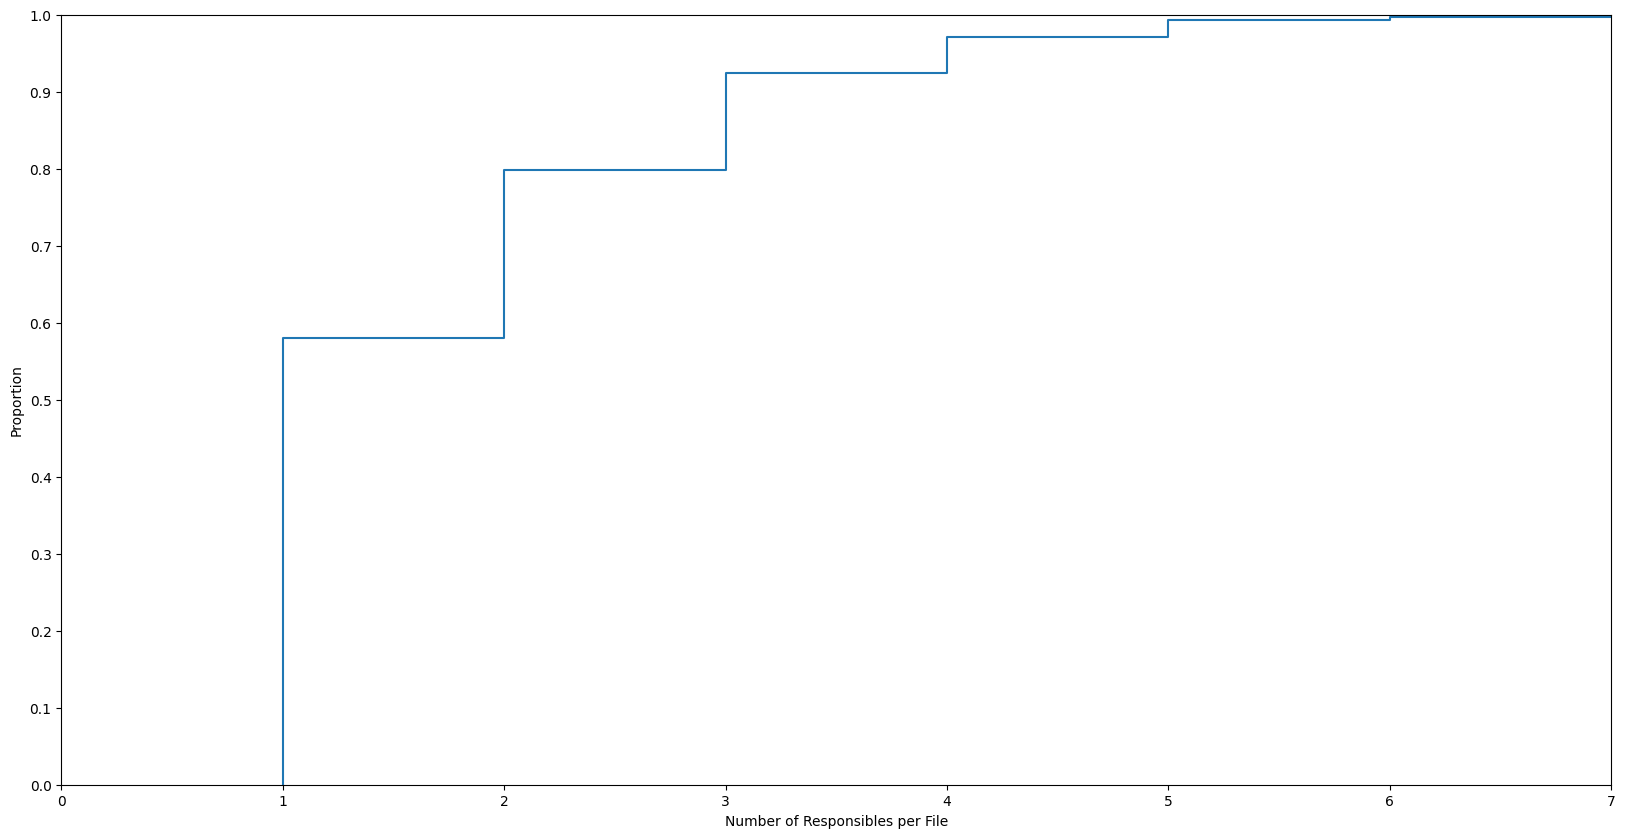

In [21]:
# Converter o dicionário para um DataFrame
data_responsaveis = pd.DataFrame(list(num_responsaveis_por_arquivo.items()), columns=['Arquivo', 'Contagem'])

# Definir o tamanho do gráfico
plt.figure(figsize=(20, 10))

# Criar o gráfico ECDF para a contagem de responsáveis por arquivo
sns.ecdfplot(data=data_responsaveis, x='Contagem')

plt.ylim(0, 1)  # Ajustar a escala do eixo y

plt.yticks(np.arange(0, 1.1, 0.1))  # Ajustar os ticks do eixo y para que sejam de 0.1 em 0.1

plt.xlabel('Number of Responsibles per File')  # Definir o rótulo do eixo x

# Ajustar a escala do eixo x, se necessário
plt.xlim(0, max(data_responsaveis['Contagem']))  # Ajuste conforme necessário

# Ajustar os ticks do eixo x para intervalos regulares, aqui ajustei para 1 em 1
plt.xticks(np.arange(0, max(data_responsaveis['Contagem'])+1, 1))

# Exibir o gráfico
plt.show()